<a href="https://colab.research.google.com/github/UKD1211/100_days_ML_cX_ISI_DS/blob/main/Polynomial_regression_day_53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline

In [107]:
X = 6*np.random.rand(200,1) - 3

In [108]:
y = 0.8*X**2 + 0.9*X + 2 + np.random.randn(200,1)

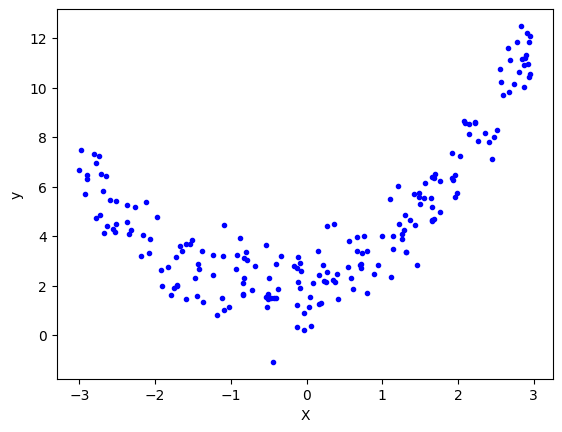

In [109]:
import matplotlib.pyplot as plt
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [110]:
import seaborn as sns

<Axes: >

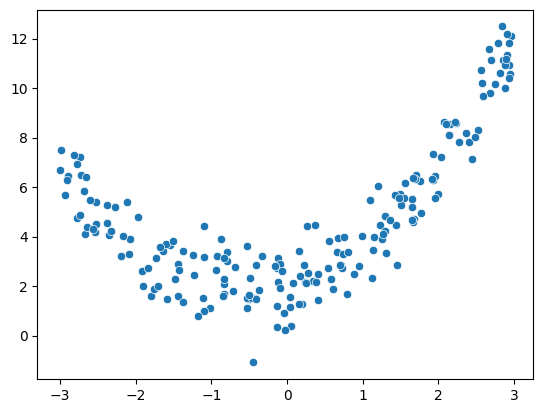

In [111]:
sns.scatterplot(x = X.flatten(),y = y.flatten())

<Axes: >

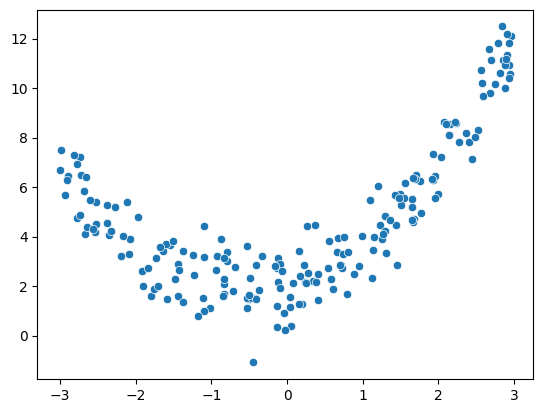

In [112]:
sns.scatterplot(x = X.ravel(),y = y.ravel())

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [114]:
lr = LinearRegression()


In [115]:
lr.fit(X_train,y_train)

LinearRegression()

In [116]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.20432754393875396

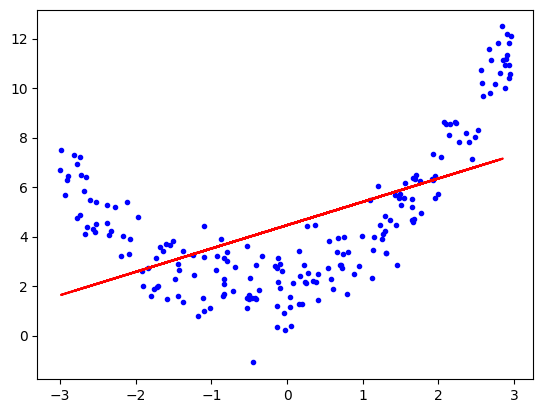

In [117]:
plt.plot(X,y,'b.')
plt.plot(X_test,y_pred,color = 'red')

In [118]:
#applying the polynomial Features

poly = PolynomialFeatures(degree = 2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [119]:
X_train[0]

array([1.22560135])

In [120]:
X_train_trans[0]

array([1.        , 1.22560135, 1.50209867])

In [121]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [122]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)


0.8642202445988689

In [123]:
lr.coef_

array([[0.        , 0.83845045, 0.80361931]])

In [124]:
lr.intercept_

array([1.97521446])

In [125]:

X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

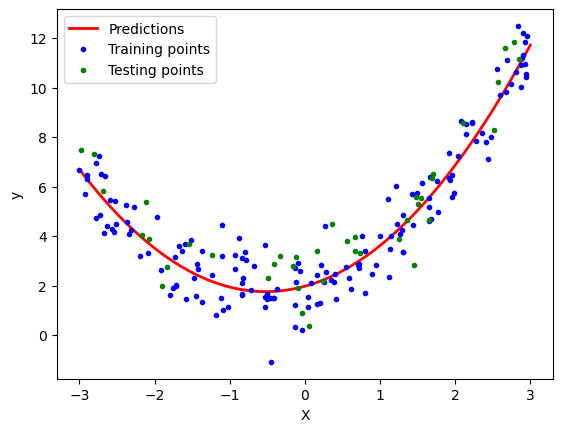

In [126]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [127]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

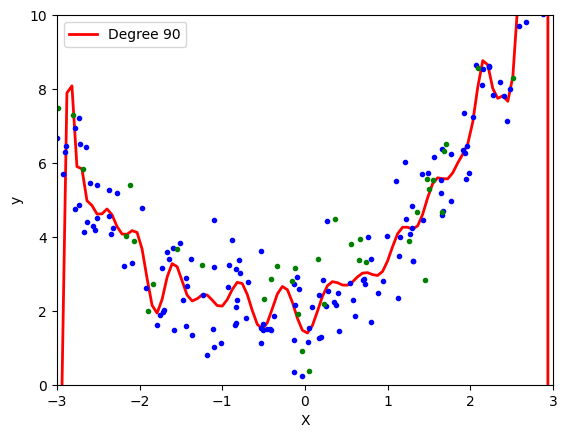

In [128]:
polynomial_regression(90)

In [129]:
#now the multiple linear regression

In [130]:
x = 7*np.random.rand(100,1) - 2.8
y = 7*np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [131]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [132]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [133]:

import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [134]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [135]:

poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [136]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [137]:

X_multi_trans.shape

(100, 496)

In [138]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [139]:

X_test_multi = poly.transform(final)

In [140]:

z_final = lr.predict(X_multi_trans).reshape(10,10)

In [142]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()